## Importing Required Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Loading Data:

In [2]:
missing_val = ['n/a', '-', '?']

data = pd.read_csv('adult.csv', na_values = missing_val)

data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
data.dropna(axis=0, how='any',inplace= True) #Handling missing values
data.drop('fnlwgt',axis=1,inplace=True)
data.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [4]:
data.shape

(45222, 14)

# DATA PREPRATION:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   education        45222 non-null  object
 3   educational-num  45222 non-null  int64 
 4   marital-status   45222 non-null  object
 5   occupation       45222 non-null  object
 6   relationship     45222 non-null  object
 7   race             45222 non-null  object
 8   gender           45222 non-null  object
 9   capital-gain     45222 non-null  int64 
 10  capital-loss     45222 non-null  int64 
 11  hours-per-week   45222 non-null  int64 
 12  native-country   45222 non-null  object
 13  income           45222 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


## Observations:
* Target variable is 'income' which is a categorical value. So we need to perform Classifiation task.
* 'educational-num' is just mathematical representation of 'education', & is also a 'Ordinal' type variable. So we can use any of them. So for simplicity, we'll remove 'education' & will assign object dtype to 'educational-num'.

In [6]:
data.drop('education',axis=1,inplace=True)

In [7]:
data_numeric = data.select_dtypes(include=['int64']) #just for further simple calculations
data_numeric.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week
0,25,7,0,0,40
1,38,9,0,0,50
2,28,12,0,0,40
3,44,10,7688,0,40
5,34,6,0,0,30


In [8]:
data_obj = data.select_dtypes(include=['object']) #just for further simple calculations
data_obj.head()

,workclass,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
5,Private,Never-married,Other-service,Not-in-family,White,Male,United-States,<=50K


<Figure size 1440x720 with 0 Axes>

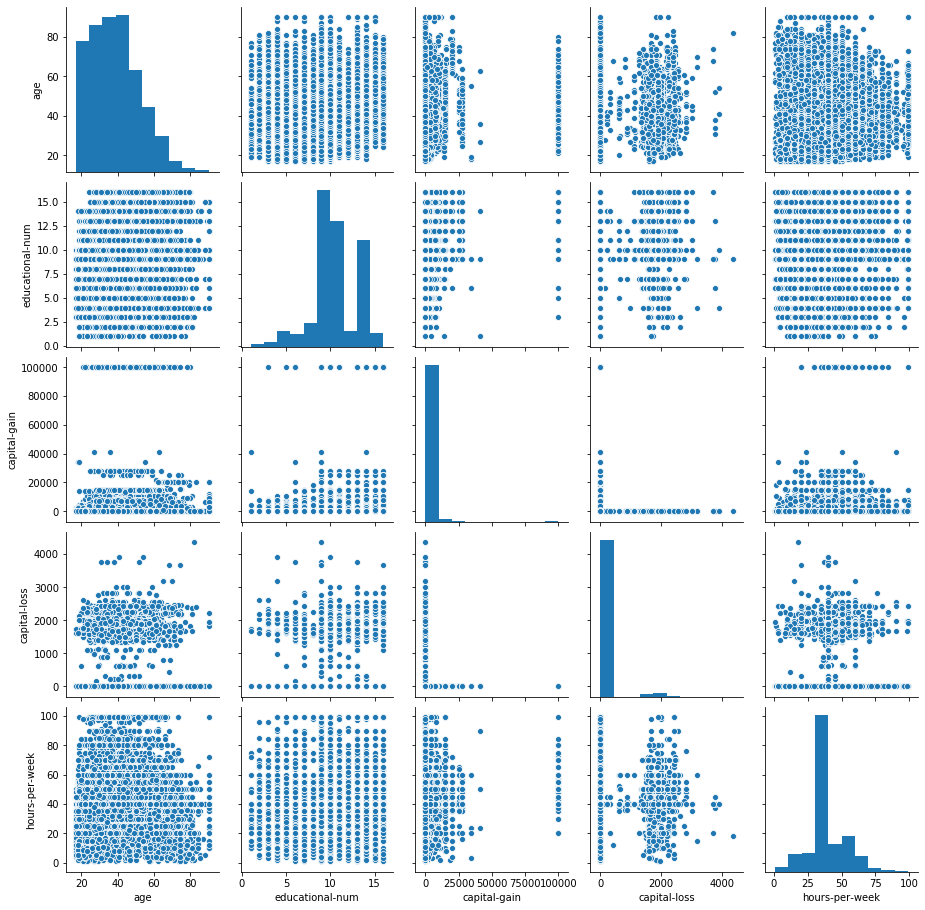

In [9]:
plt.figure(figsize=(20, 10))
sns.pairplot(data_numeric)
plt.show()

## Observations:
* It seems like there is low correlation between independent numeric variables. Let's check it.

In [10]:
cor=data_numeric.corr()
cor

,age,educational-num,capital-gain,capital-loss,hours-per-week
age,1.000000,0.037623,0.079683,0.059351,0.101992
educational-num,0.037623,1.000000,0.126907,0.081711,0.146206
capital-gain,0.079683,0.126907,1.000000,-0.032102,0.083880
capital-loss,0.059351,0.081711,-0.032102,1.000000,0.054195
hours-per-week,0.101992,0.146206,0.083880,0.054195,1.000000


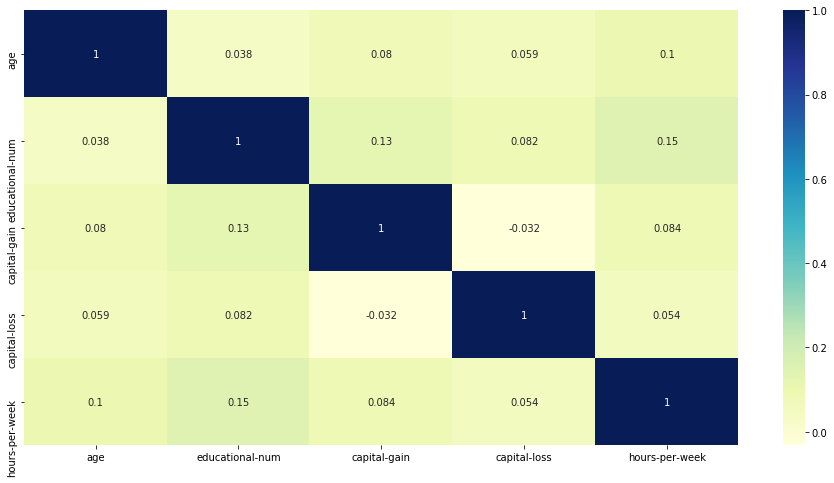

In [11]:
plt.figure(figsize=(16,8))
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

## Observation:
* The above two graphs show that there is very little correlation between independent variables.
* For classification task, normal distribution is not necessary.

In [12]:
data.describe()

,age,educational-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


## Observation:
* Capital-gain & loss are having huge deviation. Let's plot them.

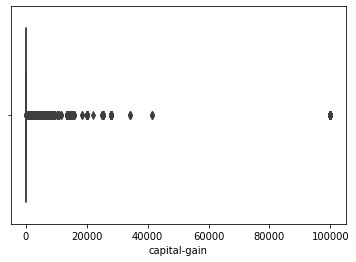

In [13]:
sns.boxplot(data['capital-gain'])

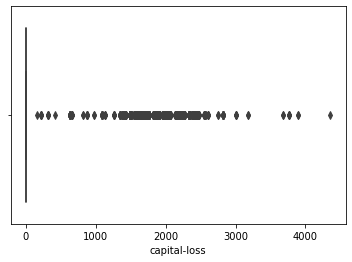

In [14]:
sns.boxplot(data['capital-loss'])

## Obervation:
* There is a huge number of outliers in capital-gain & loss. We'll deal try to reduce them after during logistic reg. For now let's see age & hrs/week.

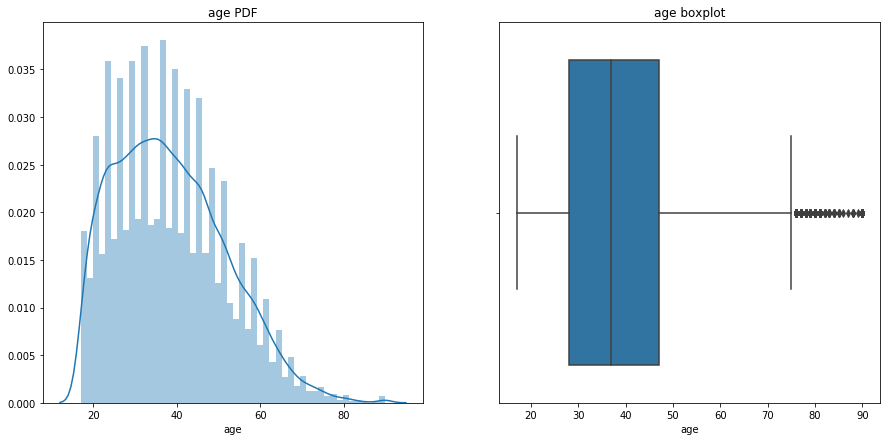

In [15]:
f, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(1,2,1)
plt.title('age PDF')
sns.distplot(data['age'], hist=True, rug=False)
plt.subplot(1,2,2)
plt.title('age boxplot')
sns.boxplot(data['age'])

## Observations:
* Age is having a descent normal distribution. Although for logistic reg, it does not matter.

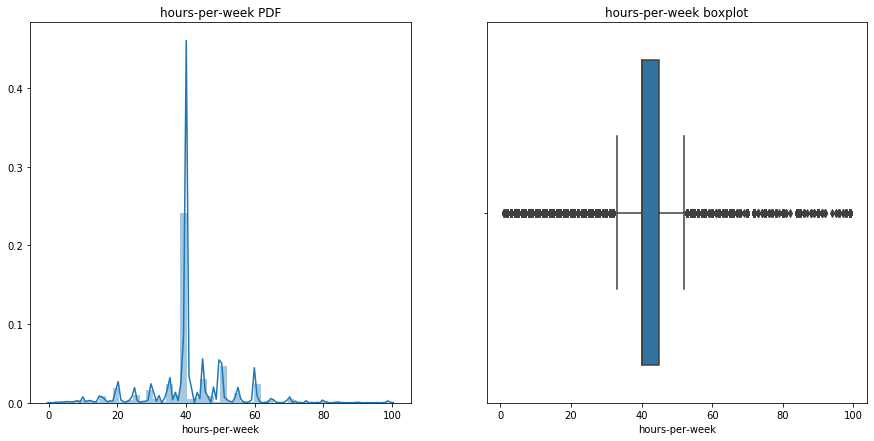

In [16]:
f, axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(1,2,1)
plt.title('hours-per-week PDF')
sns.distplot(data['hours-per-week'], hist=True, rug=False)
plt.subplot(1,2,2)
plt.title('hours-per-week boxplot')
sns.boxplot(data['hours-per-week'])

## Observation:
* hrs/week has a very high kurtosis valu with lots of noise. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B94E084348>,
      dtype=object)

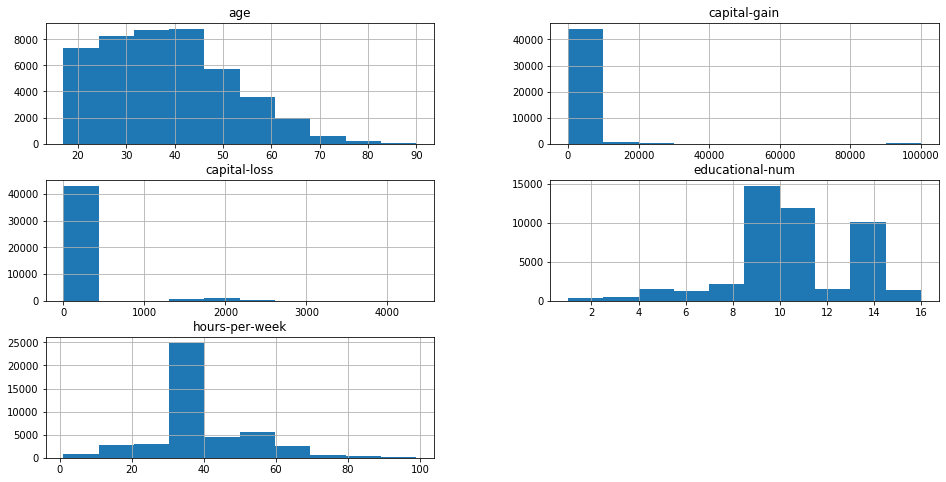

In [17]:
data[data.dtypes[(data.dtypes=="int64")].index.values].hist(figsize=[16,8])

## Observation:
* All the discussed points can be confrimed by above histograms.

# Checking Object Data:

Now we are going to check if any there is any duplicate in the object dtypes or not.

In [18]:
#just to know what we have
data_obj

,workclass,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
5,Private,Never-married,Other-service,Not-in-family,White,Male,United-States,<=50K
...,...,...,...,...,...,...,...,...
48837,Private,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
48838,Private,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
48839,Private,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
48840,Private,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [19]:
data['workclass'].astype('category').value_counts()

Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64

In [20]:
data['marital-status'].astype('category').value_counts()

Married-civ-spouse       21055
Never-married            14598
Divorced                  6297
Separated                 1411
Widowed                   1277
Married-spouse-absent      552
Married-AF-spouse           32
Name: marital-status, dtype: int64

In [21]:
data['relationship'].astype('category').value_counts()

Husband           18666
Not-in-family     11702
Own-child          6626
Unmarried          4788
Wife               2091
Other-relative     1349
Name: relationship, dtype: int64

In [22]:
data['race'].astype('category').value_counts()

White                 38903
Black                  4228
Asian-Pac-Islander     1303
Amer-Indian-Eskimo      435
Other                   353
Name: race, dtype: int64

In [23]:
data['native-country'].astype('category').value_counts()

United-States                 41292
Mexico                          903
Philippines                     283
Germany                         193
Puerto-Rico                     175
Canada                          163
El-Salvador                     147
India                           147
Cuba                            133
England                         119
China                           113
Jamaica                         103
South                           101
Italy                           100
Dominican-Republic               97
Japan                            89
Guatemala                        86
Vietnam                          83
Columbia                         82
Poland                           81
Haiti                            69
Portugal                         62
Iran                             56
Taiwan                           55
Greece                           49
Nicaragua                        48
Peru                             45
Ecuador                     

## Observation:
* Data seems clean & without dulicates. Let's scale it.

# Data Prepration:

In [24]:
# scaling numeric data
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

data_num = pd.DataFrame(scale.fit_transform(data_numeric), columns = data_numeric.columns) #Transformation for numeric data

data_num.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week
0,-1.024983,-1.221559,-0.146733,-0.21878,-0.078120
1,-0.041455,-0.438122,-0.146733,-0.21878,0.754701
2,-0.798015,0.737034,-0.146733,-0.21878,-0.078120
3,0.412481,-0.046403,0.877467,-0.21878,-0.078120
4,-0.344079,-1.613277,-0.146733,-0.21878,-0.910942


In [25]:
#encoding categorical data
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)

#coverting the numpy ndarray to dataframe after encoding.
data_catg = pd.DataFrame(encoder.fit_transform(data_obj), columns=encoder.get_feature_names(data_obj.columns))

data_catg.head()

,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_<=50K,income_>50K
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [26]:
# creating scaled dataframe
df = pd.concat([data_num, data_catg], axis=1)

df.head()

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,income_<=50K,income_>50K
0,-1.024983,-1.221559,-0.146733,-0.21878,-0.078120,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.041455,-0.438122,-0.146733,-0.21878,0.754701,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-0.798015,0.737034,-0.146733,-0.21878,-0.078120,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.412481,-0.046403,0.877467,-0.21878,-0.078120,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-0.344079,-1.613277,-0.146733,-0.21878,-0.910942,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [27]:
df.shape

(45222, 89)

In [28]:
y = df.pop('income_>50K')
y_1=df.pop('income_<=50K')
x = df

## Observation:
* I also popped 'income_<=50K' as we are dealing with two categories only. So here any one of the column has information about both. I decided to keep 'income_>50K' for model training.
* Here '0' would mean income <=50K & '1' would mean income >50K.

In [29]:
#creating train test plit
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.70, random_state=100)

In [30]:
x_tr=x_train #Just to show them apart during rfe & pca
x_te=x_test
y_tr=y_train
y_te=y_test
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(31655, 87) (31655,)
(13567, 87) (13567,)


## Observation:
* There are lots of column & many of them are not needed. Let's see why.

# Reducing Dimensionality:

Let's first approach the expected way. Here instead of calculating without any dimensionality reduction, I'd like to start with PCA first. Then I'll discuss others.

 ## 1. PCA

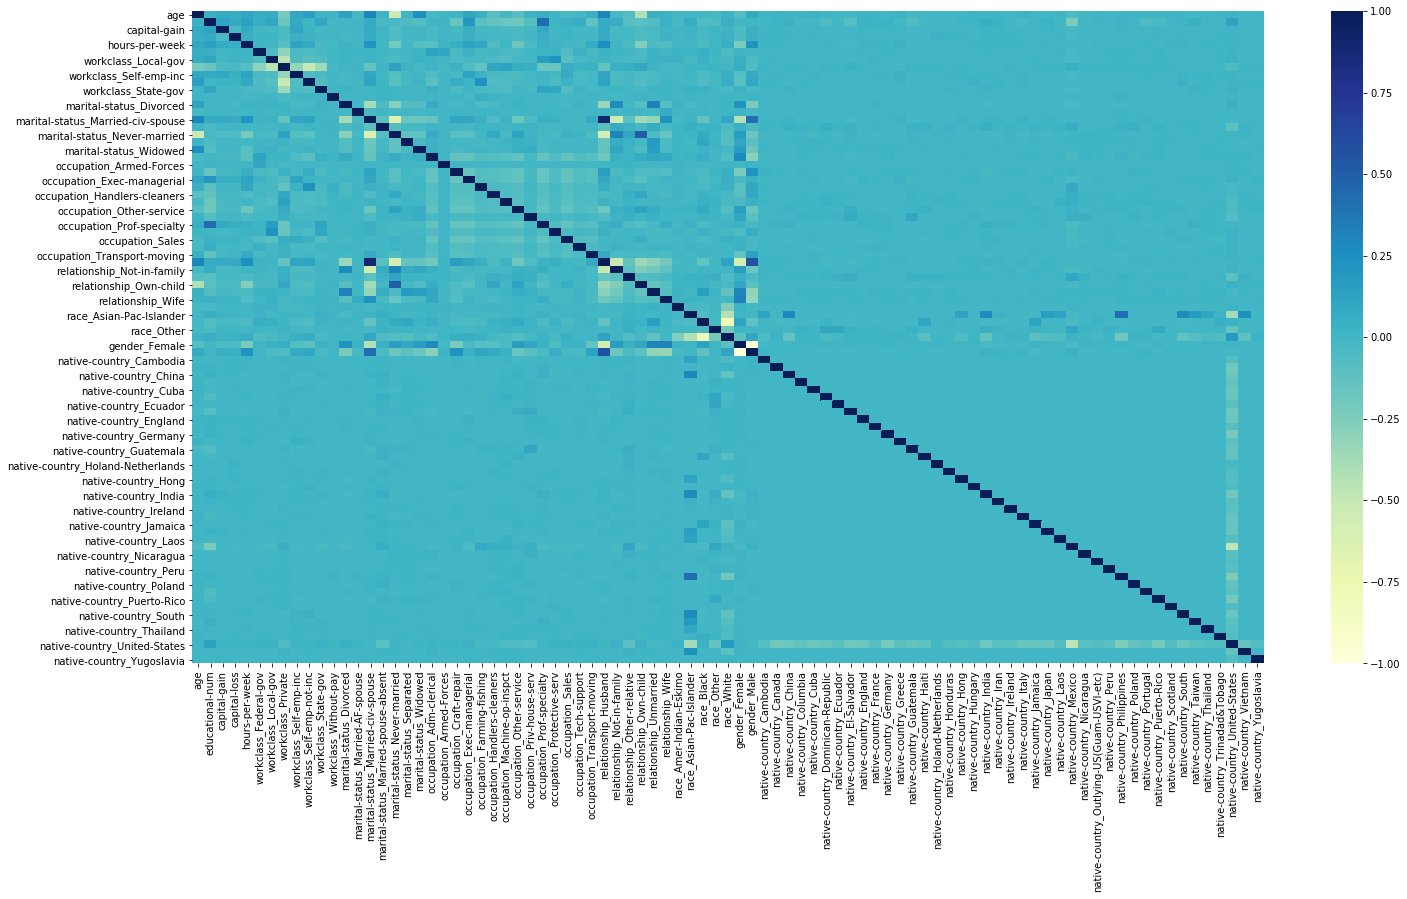

In [31]:
plt.figure(figsize=(24, 12))
sns.heatmap(x_train.corr(), cmap="YlGnBu")

## Obseravtion:
* There is significant correlation in our final dataframe. This can highly affect our model. So let's deal with it.

In [32]:
from sklearn.decomposition import PCA
pca = PCA(random_state = 0)

In [33]:
pca.fit(x_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=0,
    svd_solver='auto', tol=0.0, whiten=False)

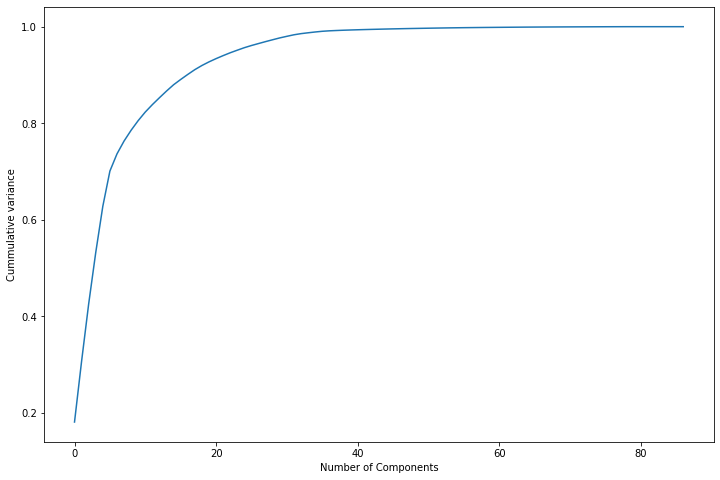

In [34]:
#showing how many components cover how much variance
plt.figure(figsize = (12, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cummulative variance')
plt.show()

## Observation:
* About 25components can cover >90% variance.
* There is not much difference for >35 components.

(cumsum matrix is not necessarily required.)

In [35]:
#but just to show
np.cumsum(pca.explained_variance_ratio_)

array([0.18128441, 0.30717428, 0.42580753, 0.53243665, 0.62814885,
       0.70101036, 0.73656052, 0.76320203, 0.78560534, 0.80557214,
       0.82328646, 0.83862335, 0.85289817, 0.86674035, 0.87977735,
       0.8906994 , 0.90110808, 0.9110522 , 0.91963406, 0.92712494,
       0.93385609, 0.94009649, 0.94600589, 0.95134756, 0.95653908,
       0.96102272, 0.96510507, 0.9691266 , 0.97297795, 0.97676579,
       0.98005568, 0.98323116, 0.98559872, 0.98736432, 0.9890207 ,
       0.99046469, 0.99143679, 0.99209326, 0.9926749 , 0.9931674 ,
       0.99362147, 0.99403519, 0.99441873, 0.99477854, 0.99513563,
       0.99547128, 0.99578041, 0.99608001, 0.99634185, 0.99660017,
       0.99685302, 0.99709498, 0.99733011, 0.99755375, 0.99776069,
       0.99794335, 0.99810988, 0.99826331, 0.99840547, 0.99853814,
       0.99866586, 0.99878753, 0.99890475, 0.99901859, 0.99913025,
       0.99921816, 0.99930521, 0.99937852, 0.99944994, 0.99952027,
       0.99958488, 0.9996489 , 0.99970978, 0.99976765, 0.99982

In [36]:
#Let's select 35 features
pca_final = PCA(n_components = 30, random_state = 0)

x_train_pca = pca_final.fit_transform(x_train) #transforming x_train data

In [37]:
x_train_pca.shape

(31655, 30)

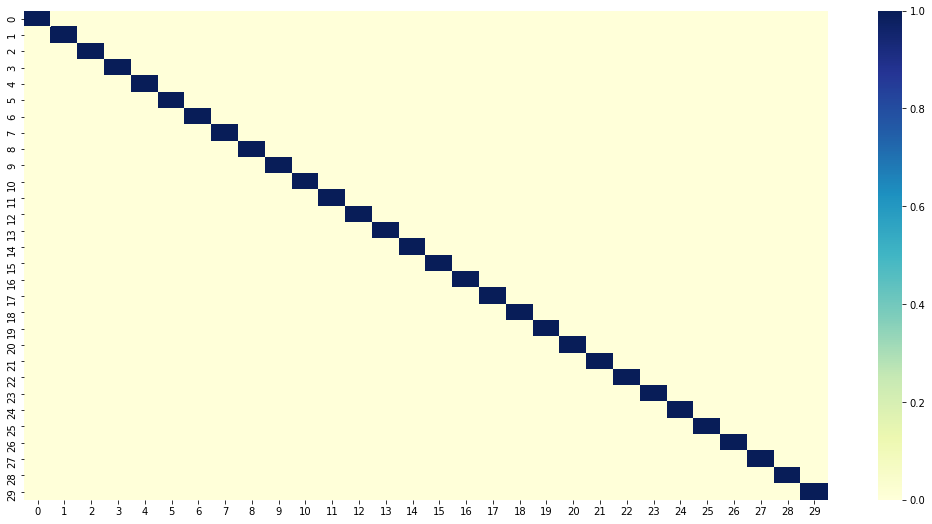

In [38]:
corrmat = np.corrcoef(x_train_pca.T)

plt.figure(figsize=(18, 9))

sns.heatmap(corrmat, cmap="YlGnBu")

## Observation:
* PCA has generated 35 independent components.

In [39]:
x_test_pca = pca_final.transform(x_test) #transforming x_test data

# LOGISTIC REGRESSION:

In [40]:
from sklearn.linear_model import LogisticRegression
clfr = LogisticRegression()
clfr.fit(x_train_pca, y_train) #giving train data

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
y_pred_pca = clfr.predict(x_test_pca)

temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_pca})

temp_df

,Actual,Predicted
40273,0.0,0.0
1984,1.0,0.0
1230,1.0,0.0
25507,0.0,0.0
553,0.0,1.0
...,...,...
19793,1.0,1.0
23298,1.0,1.0
2000,1.0,1.0
39689,1.0,1.0


In [42]:
from sklearn import metrics #Let's check for error
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred_pca))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred_pca))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_pca)))

Mean Absolute Error:  0.15007002284956145
Mean Squared Error:  0.15007002284956145
Root Mean Squared Error:  0.38738872318326645


In [43]:
metrics.accuracy_score(y_test, y_pred_pca)

0.8499299771504386

In [44]:
print(metrics.classification_report(y_test,y_pred_pca))

#number of components: 30

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90     10211
         1.0       0.74      0.60      0.66      3356

    accuracy                           0.85     13567
   macro avg       0.81      0.77      0.78     13567
weighted avg       0.84      0.85      0.84     13567



## Observations:
* Above is short analysis of the model. Model has about 85% accuracy.
* Recall & f1-score are also calculated.
* Model predicts <=50K income quit effectively. (Probably because >50K part is having more random distribution.)

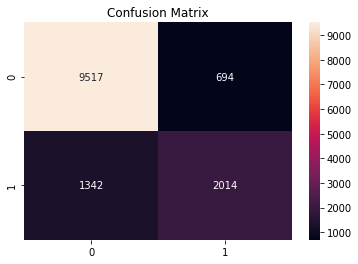

In [45]:
con = metrics.confusion_matrix(y_test, y_pred_pca)

sns.heatmap(con, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

## Observation:
* Condfusion matrix shows TP,TN,FN,FP values repectively. Recall & accuracy are already calculated.

### Let's try more algorithms.

# KNN:

In [46]:
from sklearn.neighbors import KNeighborsClassifier
clfr = KNeighborsClassifier()
clfr.fit(x_train_pca, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [47]:
y_pred_pca = clfr.predict(x_test_pca)
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_pca})
temp_df

,Actual,Predicted
40273,0.0,0.0
1984,1.0,0.0
1230,1.0,0.0
25507,0.0,0.0
553,0.0,1.0
...,...,...
19793,1.0,1.0
23298,1.0,1.0
2000,1.0,1.0
39689,1.0,1.0


In [48]:
# calculate accuracy of class predictions
metrics.accuracy_score(y_test, y_pred_pca)

0.8332719097810865

In [49]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred_pca))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred_pca))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_pca)))

Mean Absolute Error:  0.16672809021891355
Mean Squared Error:  0.16672809021891355
Root Mean Squared Error:  0.4083235117145638


In [50]:
print(metrics.classification_report(y_test,y_pred_pca))

# Number of components: 30

              precision    recall  f1-score   support

         0.0       0.88      0.91      0.89     10211
         1.0       0.68      0.61      0.64      3356

    accuracy                           0.83     13567
   macro avg       0.78      0.76      0.77     13567
weighted avg       0.83      0.83      0.83     13567



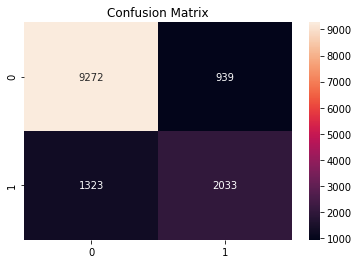

In [51]:
con = metrics.confusion_matrix(y_test, y_pred_pca)

sns.heatmap(con, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

## Observations:
* As compared to Log Reg, KNN has lesser accuracy.
* KNN also shows more error, lesser recall & f1-score.
* So here Log Reg is better option than KNN.
* This may imply that both categories are dispersed into one-anothr to some extent. 

# DESCISION TREE:

In [52]:
from sklearn.tree import DecisionTreeClassifier
clfr = DecisionTreeClassifier(max_depth = 9)
clfr.fit(x_train_pca, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [53]:
y_pred_pca = clfr.predict(x_test_pca)
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_pca})
temp_df

,Actual,Predicted
40273,0.0,0.0
1984,1.0,0.0
1230,1.0,0.0
25507,0.0,0.0
553,0.0,0.0
...,...,...
19793,1.0,1.0
23298,1.0,1.0
2000,1.0,1.0
39689,1.0,1.0


In [54]:
metrics.accuracy_score(y_test, y_pred_pca)

0.842927692194295

In [55]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred_pca))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred_pca))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_pca)))

Mean Absolute Error:  0.15707230780570502
Mean Squared Error:  0.15707230780570502
Root Mean Squared Error:  0.3963234888392373


In [56]:
print(metrics.classification_report(y_test,y_pred_pca))

# Number of components: 30

              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90     10211
         1.0       0.72      0.59      0.65      3356

    accuracy                           0.84     13567
   macro avg       0.80      0.76      0.77     13567
weighted avg       0.84      0.84      0.84     13567



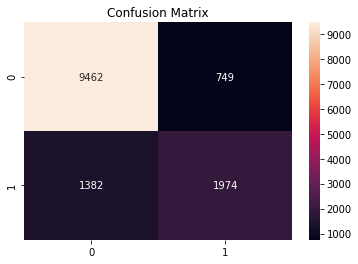

In [57]:
con = metrics.confusion_matrix(y_test, y_pred_pca)

sns.heatmap(con, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

# Observation:
* DT is a powerful alogrihm. In this dataset, it is quite a descent choice. It is better than KNN & comparable with Log Reg. Although Log Reg is still better as it has higher f1-score & lesser error.

# SVM:

Let's deal with one of the most powerful & flexible classification Algo.

In [58]:
from sklearn.svm import SVC
classifier = SVC() # using rbf kernel
classifier.fit(x_train_pca, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [59]:
y_pred_pca = classifier.predict(x_test_pca)

In [60]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_pca)

0.8544998894376059

In [61]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred_pca))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred_pca))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_pca)))

Mean Absolute Error:  0.14550011056239404
Mean Squared Error:  0.14550011056239404
Root Mean Squared Error:  0.38144476738106403


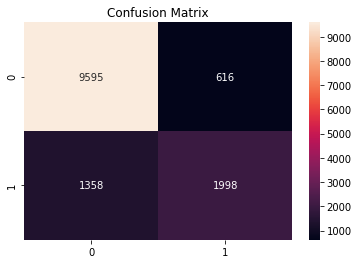

In [62]:
con = metrics.confusion_matrix(y_test, y_pred_pca)

sns.heatmap(con, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [63]:
print(metrics.classification_report(y_test,y_pred_pca))

# Number of Components: 30

              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91     10211
         1.0       0.76      0.60      0.67      3356

    accuracy                           0.85     13567
   macro avg       0.82      0.77      0.79     13567
weighted avg       0.85      0.85      0.85     13567



## Observations:
* SVM has highest accuracy, recall value & f1-score of all the discussed algos.
* It has lesser error than all the discussed algos.
* It has higher space & time complexity.

## 2. RFE:

## * Logistic Regresiion
### Let's create baseline model first

In [64]:
import warnings
warnings.filterwarnings("ignore")

In [65]:
clsfr=LogisticRegression()
base_model=clsfr.fit(x_tr,y_tr)

In [66]:
y_pred = clsfr.predict(x_te)

In [67]:
metrics.accuracy_score(y_te, y_pred)

0.8502985184639198

In [68]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_te, y_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_te, y_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_te, y_pred)))

Mean Absolute Error:  0.1497014815360802
Mean Squared Error:  0.1497014815360802
Root Mean Squared Error:  0.38691275700870886


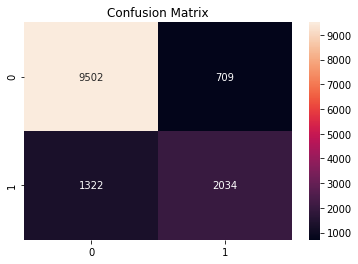

In [69]:
con = metrics.confusion_matrix(y_te, y_pred)

sns.heatmap(con, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [70]:
print(metrics.classification_report(y_te,y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90     10211
         1.0       0.74      0.61      0.67      3356

    accuracy                           0.85     13567
   macro avg       0.81      0.77      0.79     13567
weighted avg       0.84      0.85      0.84     13567



## Observations:
* One may say why to go through any knid of dimensional reduction when we have a model having about same accuracy, recall, f-1 score & error. But the thing here is in PCA we had only 35 components but here we have 102 components. To get a glimpse, we used ~291% more data in above model. This significantly increases time & space complexity.
* Warnings are because of very high number of iterations. (My PC doesn't seem to like that much iterations.)

### Let's dive into another way of dimensionality reduction.

In [71]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

In [72]:
rfe = RFE(estimator=clsfr, step=57) #dropping 57 features. So total remained features are 30
rfe = rfe.fit(x_tr, y_tr)

In [73]:
selected_rfe = pd.DataFrame({'Feature':list(x_tr.columns), 'Ranking': rfe.ranking_})
selected_rfe.sort_values(by='Ranking')

,Feature,Ranking
29,occupation_Protective-serv,1
27,occupation_Priv-house-serv,1
28,occupation_Prof-specialty,1
58,native-country_Guatemala,1
31,occupation_Tech-support,1
...,...,...
50,native-country_Cuba,2
52,native-country_Ecuador,2
53,native-country_El-Salvador,2
57,native-country_Greece,2


In [74]:
x_train_rfe = rfe.transform(x_tr)
x_test_rfe = rfe.transform(x_te)

In [75]:
x_train_rfe[0:3]

array([[ 0.3453156 , -0.1467332 ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [-1.22155881, -0.1467332 ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
   

In [76]:
rfe_model = clsfr.fit(x_train_rfe,y_tr)

In [77]:
y_pred = clsfr.predict(x_test_rfe)

In [78]:
metrics.accuracy_score(y_te, y_pred)

0.8415272352030663

In [79]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_te, y_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_te, y_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_te, y_pred)))

Mean Absolute Error:  0.15847276479693373
Mean Squared Error:  0.15847276479693373
Root Mean Squared Error:  0.39808637856240914


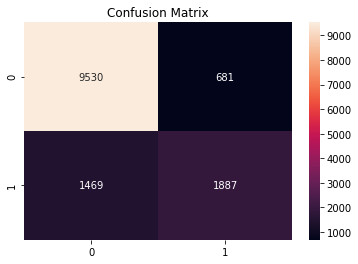

In [80]:
con = metrics.confusion_matrix(y_te, y_pred)

sns.heatmap(con, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [81]:
print(metrics.classification_report(y_te,y_pred))

# RFE step size: 57

              precision    recall  f1-score   support

         0.0       0.87      0.93      0.90     10211
         1.0       0.73      0.56      0.64      3356

    accuracy                           0.84     13567
   macro avg       0.80      0.75      0.77     13567
weighted avg       0.83      0.84      0.83     13567



## Observations:
* As one can see RFE model is also a very good model. Its acuuracy, recall, f1-score etc are slightly lesser than the base_model but there we considered 102 features & here we only took 35 features for reference.
* Just like PCA it is also a way of demensional reduction. In PCA, we merged on the basic of corr & tried to cover as much variance as we could. Here, we took most imporant features only.
* But the problem with this is that how to select the step. How to know which is the best value.

For that we use RFE with Cross Validation. (We are going to find best features in one go.)

In [82]:
rfecv = RFECV(estimator=clsfr, step=1, cv=5,scoring='accuracy')
rfecv = rfecv.fit(x_tr,y_tr)
print('optinal no. of features:', rfecv.n_features_)
print('Best Features:', x_tr.columns[rfecv.support_])

optinal no. of features: 77
Best Features: Index(['age', 'educational-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Armed-Forces', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'relationship_Husband',
       'relationship_Not-in-family', 'relationship_Other-relative'

In [83]:
rfecv.grid_scores_ #basically a kind of score for importance based upon accuracy

array([0.75921655, 0.78767967, 0.78761649, 0.78821671, 0.78878534,
       0.78944874, 0.78951193, 0.78982783, 0.79042805, 0.79055441,
       0.79115464, 0.79147054, 0.79147054, 0.79147054, 0.80859264,
       0.80830832, 0.81920708, 0.83528668, 0.83550782, 0.83553941,
       0.83702417, 0.83702417, 0.83740325, 0.83778234, 0.83828779,
       0.83831938, 0.83816143, 0.83819302, 0.83806666, 0.83879324,
       0.83882483, 0.83898278, 0.83961459, 0.83999368, 0.84002527,
       0.84005686, 0.8399305 , 0.84008845, 0.84008845, 0.84037277,
       0.84037277, 0.84018323, 0.84049913, 0.84065708, 0.84087822,
       0.84081504, 0.84043595, 0.84147844, 0.84163639, 0.84163639,
       0.84154162, 0.84185753, 0.84192071, 0.84154162, 0.84185753,
       0.84264729, 0.84324751, 0.84406887, 0.84429   , 0.84457432,
       0.84479545, 0.84545885, 0.84561681, 0.84590112, 0.84637498,
       0.84621703, 0.84615385, 0.84640657, 0.84618544, 0.84628021,
       0.8463118 , 0.84634339, 0.84640657, 0.84656452, 0.84659

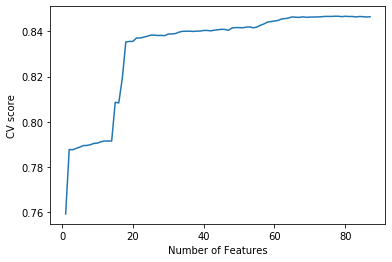

In [84]:
plt.figure()
plt.xlabel('Number of Features')
plt.ylabel('CV score')
plt.plot(range(1, len(rfecv.grid_scores_)+1), rfecv.grid_scores_)
plt.show()

## Observations:
* From this graph we can use refcv transform to find the best output, or we could simply select features acording to our need. Like selecting only 20 features will give ~83% CV score.

#### just for the sake of completion, let's use rfecv transform

In [85]:
x_train_rfecv = rfecv.transform(x_tr)
x_test_rfecv = rfecv.transform(x_te)

In [86]:
rfecv_model = clsfr.fit(x_train_rfecv, y_tr)

In [87]:
y_pred = clsfr.predict(x_test_rfecv)

In [88]:
metrics.accuracy_score(y_te, y_pred)

0.8501511019385273

In [89]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_te, y_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_te, y_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_te, y_pred)))

Mean Absolute Error:  0.1498488980614727
Mean Squared Error:  0.1498488980614727
Root Mean Squared Error:  0.3871032137059478


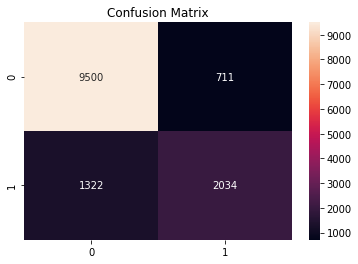

In [90]:
con = metrics.confusion_matrix(y_te, y_pred)

sns.heatmap(con, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [91]:
print(metrics.classification_report(y_te,y_pred))

#for rfecv

              precision    recall  f1-score   support

         0.0       0.88      0.93      0.90     10211
         1.0       0.74      0.61      0.67      3356

    accuracy                           0.85     13567
   macro avg       0.81      0.77      0.79     13567
weighted avg       0.84      0.85      0.84     13567



### Observations:
* The above is the best model (in terms of accuracy), RFECV or RFE can give.

# KNN:

## * Base Model

In [92]:
clsfr=KNeighborsClassifier()
base_model=clsfr.fit(x_tr,y_tr)

In [93]:
y_pred = clsfr.predict(x_te)

In [94]:
metrics.accuracy_score(y_te, y_pred)

0.8354094493992776

In [95]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_te, y_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_te, y_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_te, y_pred)))

Mean Absolute Error:  0.16459055060072234
Mean Squared Error:  0.16459055060072234
Root Mean Squared Error:  0.40569760980405384


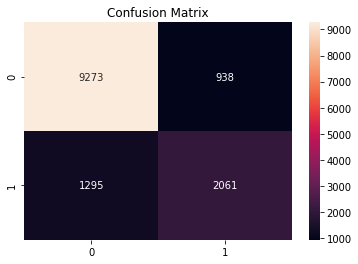

In [96]:
con = metrics.confusion_matrix(y_te, y_pred)

sns.heatmap(con, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [97]:
print(metrics.classification_report(y_te,y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.91      0.89     10211
         1.0       0.69      0.61      0.65      3356

    accuracy                           0.84     13567
   macro avg       0.78      0.76      0.77     13567
weighted avg       0.83      0.84      0.83     13567



## * KNN using RFE:

In [98]:
rfe_model = clsfr.fit(x_train_rfe,y_tr)
y_pred = clsfr.predict(x_test_rfe)
metrics.accuracy_score(y_te, y_pred)

0.8289231222820078

In [99]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_te, y_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_te, y_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_te, y_pred)))

Mean Absolute Error:  0.17107687771799218
Mean Squared Error:  0.17107687771799218
Root Mean Squared Error:  0.41361440704839114


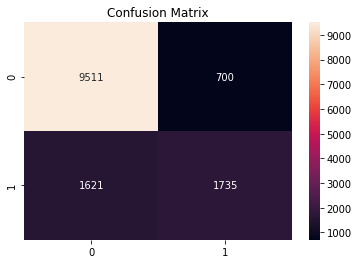

              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89     10211
         1.0       0.71      0.52      0.60      3356

    accuracy                           0.83     13567
   macro avg       0.78      0.72      0.75     13567
weighted avg       0.82      0.83      0.82     13567



In [100]:
con = metrics.confusion_matrix(y_te, y_pred)

sns.heatmap(con, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()
print(metrics.classification_report(y_te,y_pred))

# RFE STep Size: 57

## Observation:
* Because we used only 35 features, KNN using RFE is not as goog as base KNN. Although it is still a descent model. We need to increase no. of feature for better KNN.

## *Base DT

In [101]:
clsfr = DecisionTreeClassifier(max_depth = 9)
base_model=clsfr.fit(x_tr,y_tr)
y_pred = clsfr.predict(x_te)

metrics.accuracy_score(y_te, y_pred)

0.8561951794796197

Mean Absolute Error:  0.14380482052038032
Mean Squared Error:  0.14380482052038032
Root Mean Squared Error:  0.3792160604726286


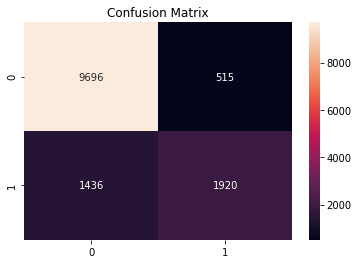

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     10211
         1.0       0.79      0.57      0.66      3356

    accuracy                           0.86     13567
   macro avg       0.83      0.76      0.79     13567
weighted avg       0.85      0.86      0.85     13567



In [102]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_te, y_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_te, y_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_te, y_pred)))
con = metrics.confusion_matrix(y_te, y_pred)

sns.heatmap(con, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()
print(metrics.classification_report(y_te,y_pred))

## *DT using RFE:

In [103]:
rfe_model = clsfr.fit(x_train_rfe,y_tr)
y_pred = clsfr.predict(x_test_rfe)
metrics.accuracy_score(y_te, y_pred)

0.8471290631679811

Mean Absolute Error:  0.15287093683201886
Mean Squared Error:  0.15287093683201886
Root Mean Squared Error:  0.3909871312869758


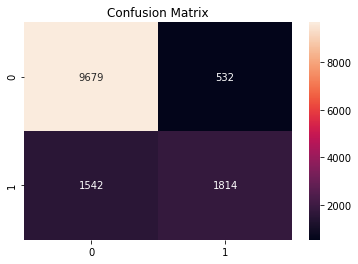

              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90     10211
         1.0       0.77      0.54      0.64      3356

    accuracy                           0.85     13567
   macro avg       0.82      0.74      0.77     13567
weighted avg       0.84      0.85      0.84     13567



In [104]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_te, y_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_te, y_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_te, y_pred)))

con = metrics.confusion_matrix(y_te, y_pred)

sns.heatmap(con, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()
print(metrics.classification_report(y_te,y_pred))

# RFE Step Size: 57

## Observation:
* The RFE uses ~291% less data & give a model with about same performance. (as expected)

## *Base SVM:

In [105]:
clsfr = SVC() # using rbf kernel
base_model=clsfr.fit(x_tr, y_tr)
y_pred = clsfr.predict(x_te)

metrics.accuracy_score(y_te, y_pred)

0.853320557234466

Mean Absolute Error:  0.14667944276553402
Mean Squared Error:  0.14667944276553402
Root Mean Squared Error:  0.38298752298937105


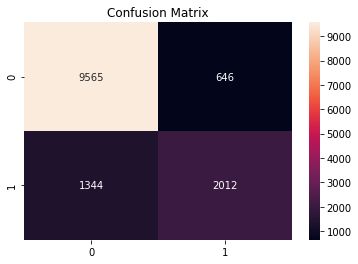

              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91     10211
         1.0       0.76      0.60      0.67      3356

    accuracy                           0.85     13567
   macro avg       0.82      0.77      0.79     13567
weighted avg       0.85      0.85      0.85     13567



In [106]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_te, y_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_te, y_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_te, y_pred)))
con = metrics.confusion_matrix(y_te, y_pred)

sns.heatmap(con, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()
print(metrics.classification_report(y_te,y_pred))

## *SVM using RFE:

In [107]:
rfe_model = clsfr.fit(x_train_rfe,y_tr)
y_pred = clsfr.predict(x_test_rfe)
metrics.accuracy_score(y_te, y_pred)

0.8453600648632712

Mean Absolute Error:  0.15463993513672883
Mean Squared Error:  0.15463993513672883
Root Mean Squared Error:  0.3932428449911439


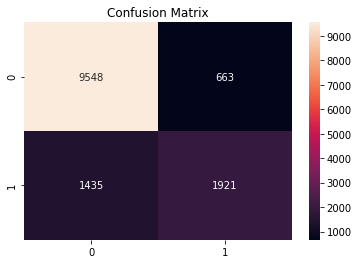

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90     10211
         1.0       0.74      0.57      0.65      3356

    accuracy                           0.85     13567
   macro avg       0.81      0.75      0.77     13567
weighted avg       0.84      0.85      0.84     13567



In [108]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_te, y_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_te, y_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_te, y_pred)))

con = metrics.confusion_matrix(y_te, y_pred)

sns.heatmap(con, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()
print(metrics.classification_report(y_te,y_pred))

# RFE Step Size: 57

## Observation:
* Here also the result of base SVM & SVM using RFE are in agreement. Hence RFE is also a very powerful tool for dimensionality reduction.

* Considering Everything we did till now, it is clear that good EDA, Data prepration are necessary for implementing an algorithm. Also, the method of dimensionality reduction & the ML algo to be chosen depends upon many factors like hardware, software, requirements, tolerance, economy etc.

# The End!